In [1]:
import numpy as np

def least_square(y:np.ndarray, x_mat: np.matrix):
    a = np.matmul(x_mat.T, x_mat)
    try:
        inv_a = np.linalg.inv(a)
    except np.linalg.LinAlgError:
        inv_a = np.linalg.pinv(a)

    y = np.squeeze(y)
    b = x_mat.T.dot(y)
    return np.matmul(inv_a, b)

def normalize_axis(a: np.ndarray):
    """
    Make sure the matrix has two dimension
    """
    if len(a.shape) == 1:
        return np.expand_dims(a, axis=1)
    else:
        return a

def build_matrix(x: np.ndarray):
    return np.c_[np.ones((len(x), 1)), x]
def mse_loss(a, b):
    return np.mean((a - b) ** 2)


def load_npz(path: str):
    data = np.load(path)
    x, y  = data['X'], data['y']
    x = normalize_axis(x)
    y = normalize_axis(y)
    return x, y
def split_data(x, y, split_ratio = 0.9, seed=456):
    np.random.seed(seed)
    np.random.shuffle(x)
    np.random.seed(seed)
    np.random.shuffle(y)

    num_sample = len(x)
    interval = int(num_sample * split_ratio)
    x_train, y_train = x[:interval,...], y[:interval,...]
    x_test, y_test = x[interval:,...], y[interval:,...]

    return (x_train, y_train), (x_test, y_test)
x, y = load_npz('./data2.npz')
(x_train, y_train), (x_test, y_test) = split_data(x, y)

In [2]:
import matplotlib.pyplot as plt
class KNN_linear_regressor(object):
    def __init__(self, n_neighbors:int=10):
        self.n_neighbors = n_neighbors
        self.x = None
        self.y = None
    def fit(self, x:np.ndarray, y:np.ndarray):
        self.x = normalize_axis(x)
        self.y = normalize_axis(y)

    def predict(self, x: np.ndarray) -> np.ndarray:
        x = normalize_axis(x)
        distance = np.sum((x[:,np.newaxis,:] - self.x[np.newaxis,:,:]) ** 2, axis=-1)
        min_indices = np.argsort(distance, axis=-1)
        neighbors_indices = min_indices[:,:self.n_neighbors]
        result = []
        for i, indices in enumerate(neighbors_indices):
            neighbors_x = self.x[indices,...]
            neighbors_y = self.y[indices,...]
            w = least_square(neighbors_y, build_matrix(neighbors_x))
            result.append(build_matrix(x[np.newaxis, i]).dot(w))
            
        return np.array(result)
    
    def _plot2d(self):
        plt.figure()
        plt.xlabel('X')
        plt.ylabel('y')
        plt.scatter(self.x, self.y, s=2)

        new_x = np.arange(min(x), max(x), 0.005)
        new_y = self.predict(new_x)
        plt.scatter(new_x, new_y, c='r',s=0.5)
        plt.show()
    def _plot3d(self):

        # fig = plt.figure()
        ax = plt.axes(projection='3d') #fig.gca()
        ax.set_xlabel('$x_0$')
        ax.set_ylabel('$x_1$')
        ax.set_zlabel('$y$')
        ax.scatter(self.x[:,0], self.x[:,1], self.y, c=self.y, cmap='Reds', marker='o')

        # ax.scatter(x2, y2, z2, c=z2, cmap='Blues', marker='o', label='My Points 2')

        temp_x = []

        x0 = x[:, 0]
        x1 = x[:, 1]
        x0_range = np.arange(min(x0), max(x0), 0.1)
        x1_range = np.arange(min(x1), max(x1), 0.1)

        new_x = []
        for x0 in x0_range:
            for x1 in x1_range:
                new_x.append([x0, x1])
        new_x = np.array(new_x)
        new_y = self.predict(new_x)
        ax.scatter(new_x[:,0], new_x[:,1], new_y, c=new_y, cmap='Blues', marker='o', s=1)
        plt.show()
    def plot_fig(self):
        if not isinstance(self.x, np.ndarray):
            raise ValueError("Please call .fit() first!")
        print(self.x.shape[1])
        if self.x.shape[1] == 1:
            self._plot2d()
        else:
            self._plot3d()

2


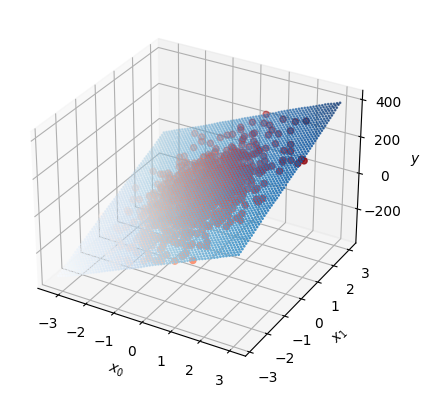

In [4]:
import matplotlib.pyplot as plt
regressor = KNN_linear_regressor(30)
regressor.fit(x, y)
regressor.plot_fig()
# def plot_2d(x, y):
#     plt.figure()
#     plt.xlabel('X')
#     plt.ylabel('y')
#     plt.scatter(x, y, s=2)



#     plt.scatter(new_x, new_y, c='r',s=0.5)



In [3]:
for n_neigh in range(2, 30):
    regressor = KNN_linear_regressor(n_neighbors=n_neigh)
    regressor.fit(x_train, y_train)
    y_test_predict = regressor.predict(x_test)
    print(n_neigh, mse_loss(y_test_predict, y_test))

2 44720.744004059045
3 147702.27819677486
4 92.68571214726339
5 38.03342522743462
6 26.283199154702952
7 26.217360877142482
8 26.15667769872402
9 24.91705799542605
10 24.783706833874124
11 24.29624101990185
12 24.668385582935485
13 24.744220837604317
14 24.32817881142523
15 24.734628634413173
16 24.623593938221042
17 24.66714258334769
18 24.760385618060617
19 24.549409182647814
20 24.553562571079166
21 24.40038922492336
22 24.118987414973326
23 24.011232421737727
24 23.9929227613803
25 24.070059369550656
26 23.88566468742361
27 23.679565229208308
28 23.895970549845774
29 23.894525165239315


In [66]:
for n_neigh in range(2, 30):
    regressor = KNN_linear_regressor(n_neighbors=n_neigh)
    regressor.fit(x_train, y_train)
    y_test_predict = regressor.predict(x_test)
    print(n_neigh, mse_loss(y_test_predict, y_test))

2 358.00781020763577
3 63.920155857135114
4 64.27499144198994
5 62.822040372808836
6 63.23295422070534
7 61.65382951252801
8 62.27033253137588
9 62.370646958614884
10 62.04616309563717
11 61.85149319955859
12 61.82487807086007
13 61.69863586226015
14 61.52514065027445
15 61.41293209951868
16 61.36068151898219
17 61.524601305104
18 61.698835273079936
19 61.81261773536087
20 61.94150209597356
21 61.808353193149635
22 61.81490953247269
23 61.794823395692
24 61.68033712019861
25 61.54618961880852
26 61.614891329703724
27 61.60844471321204
28 61.5022307008132
29 61.47553817350321


In [ ]:
def least_square(y, x_mat):
    a = x_mat.T.dot(x_mat)
    b = x_mat.T.dot(y)
    # print(a)
    # print(b)
    return np.linalg.solve(a,b)
def build_poly(x, degree):
    poly = np.ones((len(x), 1))
    for deg in range(1, degree + 1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly
def mse_loss(a, b):
    return np.mean((a - b) ** 2)

for degree in range(10):
# degree = 4
    #x_mat = np.c_[np.ones(len(x_train)), x_train.squeeze()]
    x_mat = build_poly(x_train.squeeze(), degree)
    w = least_square(y_train.squeeze(), x_mat)

    # x_test_mat = np.c_[np.ones(len(x_test)), x_test.squeeze()]
    predict_y = np.matmul(x_test_mat, w)
    print(degree, mse_loss(predict_y, y_test))

In [47]:
losses = []
for n_neigh in range(2, 30):
    regressor = KNeighborsRegressor(n_neighbors=n_neigh)
    regressor.fit(x_train[:,np.newaxis], y_train[:,np.newaxis])
    loss = mse_loss(regressor.predict(x_test[:,np.newaxis]), y_test[:,np.newaxis])
    print(n_neigh, "{:.3f}".format(loss))
    losses.append(loss)

2 5.668
3 5.591
4 5.077
5 4.844
6 4.719
7 4.477
8 4.552
9 4.559
10 4.599
11 4.648
12 4.669
13 4.509
14 4.462
15 4.482
16 4.368
17 4.294
18 4.398
19 4.292
20 4.232
21 4.234
22 4.211
23 4.182
24 4.123
25 4.115
26 4.164
27 4.154
28 4.082
29 4.045


27


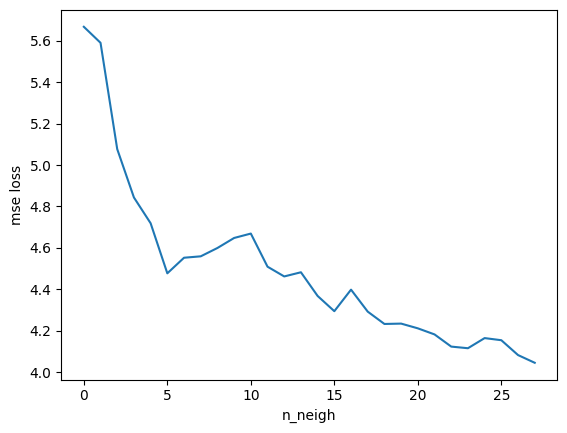

In [48]:
import matplotlib.pyplot as plt


plt.xlabel("n_neigh")
plt.ylabel("mse loss")
plt.plot(range(len(losses)), losses)
print(np.argmin(losses))

In [ ]:
x.shape

In [ ]:
data['X']

In [ ]:
data['y']